In [4]:
!pip install pandas numpy matplotlib seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [7]:
import pandas as pd

df = pd.read_csv(r"C:\Users\parna\Downloads\archive (5)\online_retail.csv",
                 encoding="ISO-8859-1")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Check basic info
df.info()

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove rows without CustomerID
df = df[df['CustomerID'].notna()]

# Remove cancelled invoices (InvoiceNo starting with C)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero quantity
df = df[df['Quantity'] > 0]

# Remove zero or negative price
df = df[df['UnitPrice'] > 0]

# Create Sales column
df['Sales'] = df['Quantity'] * df['UnitPrice']

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['MonthName'] = df['InvoiceDate'].dt.strftime('%b')
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

In [10]:
total_sales = df['Sales'].sum()
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()
avg_order_value = total_sales / total_orders

print("Total Revenue (£):", round(total_sales,2))
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Average Order Value (£):", round(avg_order_value,2))

Total Revenue (£): 8911407.9
Total Orders: 18532
Total Customers: 4338
Average Order Value (£): 480.87


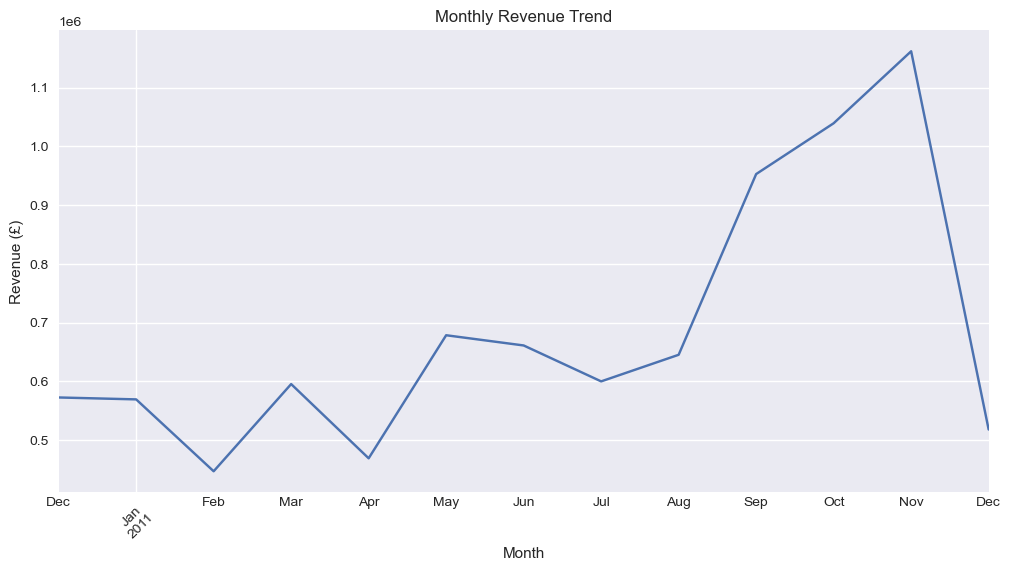

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales = df.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.xticks(rotation=45)
plt.show()

In [12]:
print("Best Sales Month:", monthly_sales.idxmax())

Best Sales Month: 2011-11


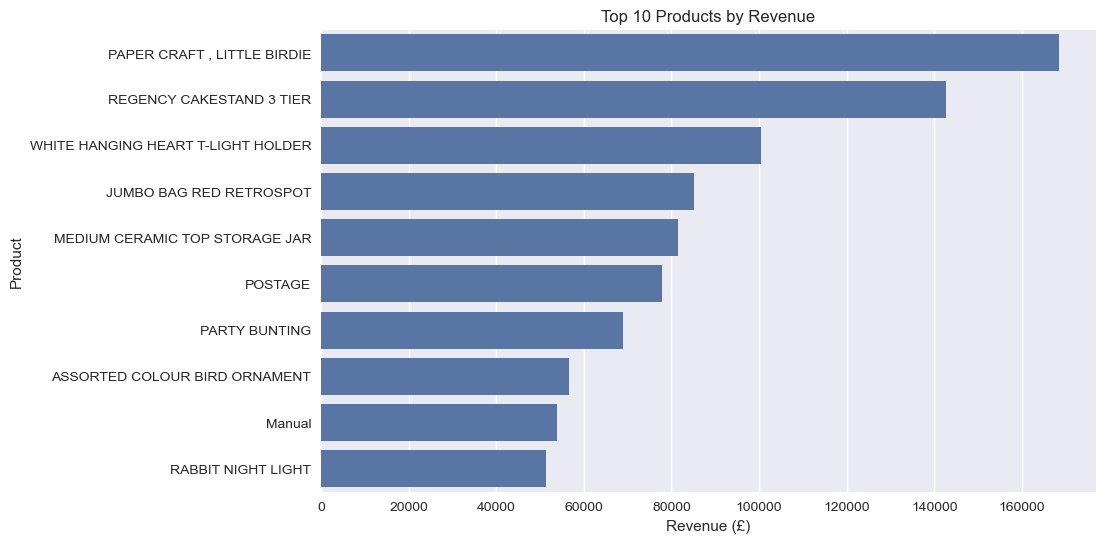

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Sales, dtype: float64

In [13]:
top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Product")
plt.show()

top_products

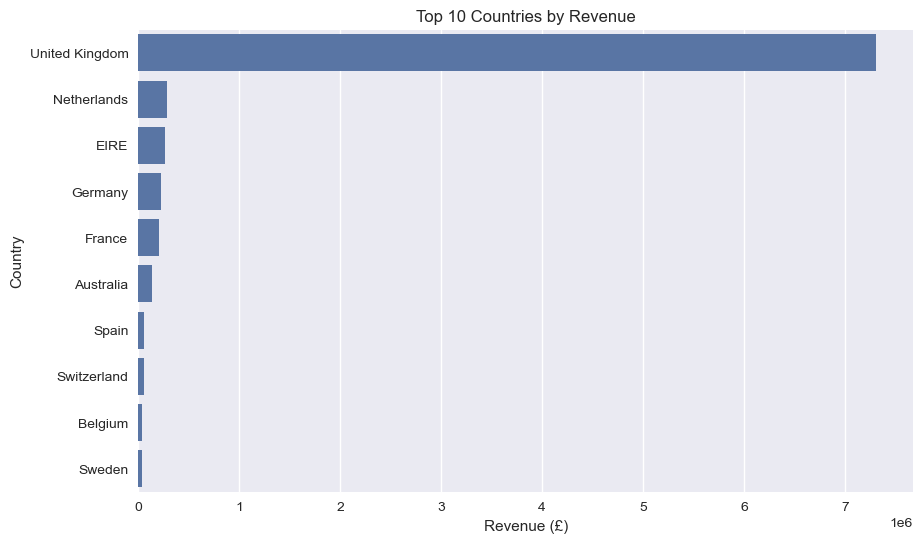

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Sales, dtype: float64

In [14]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Country")
plt.show()

country_sales

In [15]:
top_customers = df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False).head(10)

top_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Sales, dtype: float64

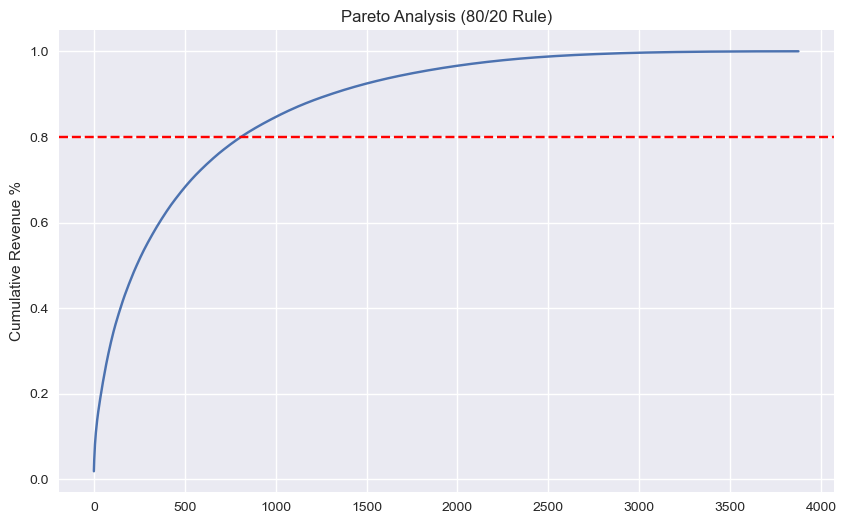

In [16]:
product_sales = df.groupby('Description')['Sales'].sum().sort_values(ascending=False)

cumulative_percentage = product_sales.cumsum() / product_sales.sum()

plt.figure(figsize=(10,6))
plt.plot(cumulative_percentage.values)
plt.axhline(y=0.8, color='red', linestyle='--')
plt.title("Pareto Analysis (80/20 Rule)")
plt.ylabel("Cumulative Revenue %")
plt.show()

In [17]:
print("------ BUSINESS INSIGHTS ------")
print("Top Revenue Country:", country_sales.index[0])
print("Top Selling Product:", top_products.index[0])
print("Total Revenue Generated: £", round(total_sales,2))
print("Average Order Value: £", round(avg_order_value,2))
print("Peak Sales Month:", monthly_sales.idxmax())

------ BUSINESS INSIGHTS ------
Top Revenue Country: United Kingdom
Top Selling Product: PAPER CRAFT , LITTLE BIRDIE
Total Revenue Generated: £ 8911407.9
Average Order Value: £ 480.87
Peak Sales Month: 2011-11
